<a href="https://colab.research.google.com/github/AVALKOVA298/Social-media-advertising/blob/main/SMAD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# --- Импорт библиотек и загрузка данных ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем данные
df = pd.read_csv('/content/Social_Media_Advertising.csv')

In [3]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 124011 rows and 16 columns


In [4]:
# Просмотрим первые строки
display(df.head())

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500.0,3000.0,7.0,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500.0,3000.0,5.0,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500.0,3000.0,9.0,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293.0,1937.0,1.0,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293.0,1937.0,1.0,Home,2022-08-24,Hearth Harmony


In [5]:
# --- 2️⃣ Предобработка данных ---
# Удаляем символ $ и превращаем Acquisition_Cost в число
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4044811738.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)


In [9]:
# Преобразуем Duration в число (убираем слово "Days")
df['Duration'] = df['Duration'].str.replace(' Days', '')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(0).astype(int)

In [10]:
# Проверим пропуски
print("Пропуски в данных:\n", df.isnull().sum())

Пропуски в данных:
 Campaign_ID         0
Target_Audience     0
Campaign_Goal       0
Duration            0
Channel_Used        1
Conversion_Rate     1
Acquisition_Cost    1
ROI                 1
Location            1
Language            1
Clicks              1
Impressions         1
Engagement_Score    1
Customer_Segment    1
Date                1
Company             1
dtype: int64


In [11]:
df = df.fillna(0)

In [12]:
# ---Общая информация о числовых признаках ---
display(df.describe())

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,124011.000000,124011.000000,124011.000000,124011.000000,124011.000000,124011.000000,124011.000000,124011.000000
mean,549594.718041,20.927982,0.080049,3406.816970,3.182474,7771.933143,24779.527445,4.374685
std,260759.985212,7.333677,0.040571,1836.886921,2.460869,4581.477151,13565.457752,3.152247
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,323445.500000,15.000000,0.050000,1865.155000,0.930000,3896.000000,13269.000000,1.000000
50%,549542.000000,15.000000,0.080000,3491.420000,2.680000,7377.000000,23914.000000,4.000000
75%,776214.000000,30.000000,0.120000,4990.860000,5.330000,11394.000000,35269.000000,7.000000
max,999993.000000,30.000000,0.150000,6493.620000,8.000000,16827.000000,51363.000000,10.000000


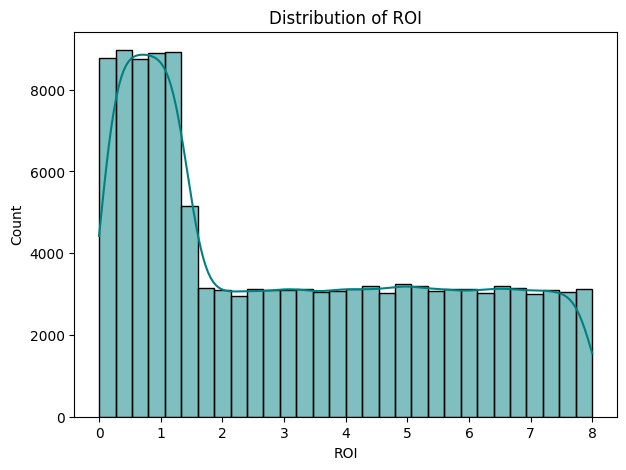

In [13]:
# --- Распределение ROI ---
plt.figure(figsize=(7,5))
sns.histplot(df['ROI'], bins=30, kde=True, color='teal')
plt.title('Distribution of ROI')
plt.xlabel('ROI')
plt.show()

/tmp/ipython-input-3535858215.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Channel_Used', y='ROI', ci=None, palette='viridis')
/tmp/ipython-input-3535858215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Channel_Used', y='ROI', ci=None, palette='viridis')


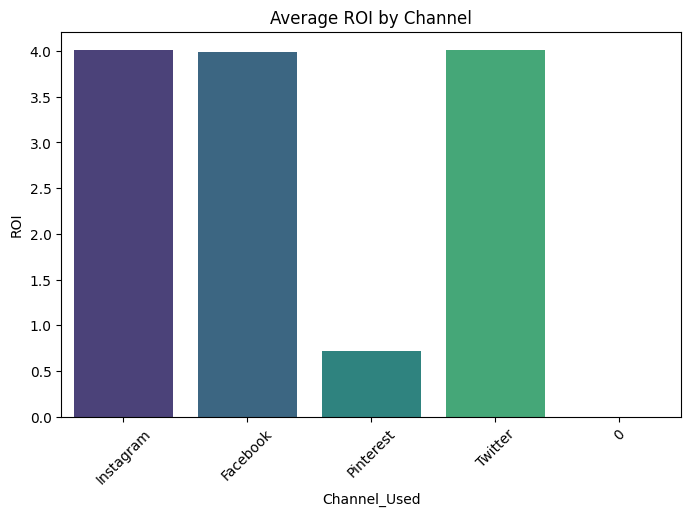

In [14]:
# --- 5️⃣ Средний ROI по каналам ---
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Channel_Used', y='ROI', ci=None, palette='viridis')
plt.title('Average ROI by Channel')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2011290158.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Target_Audience', y='ROI', ci=None, palette='coolwarm')
/tmp/ipython-input-2011290158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Target_Audience', y='ROI', ci=None, palette='coolwarm')


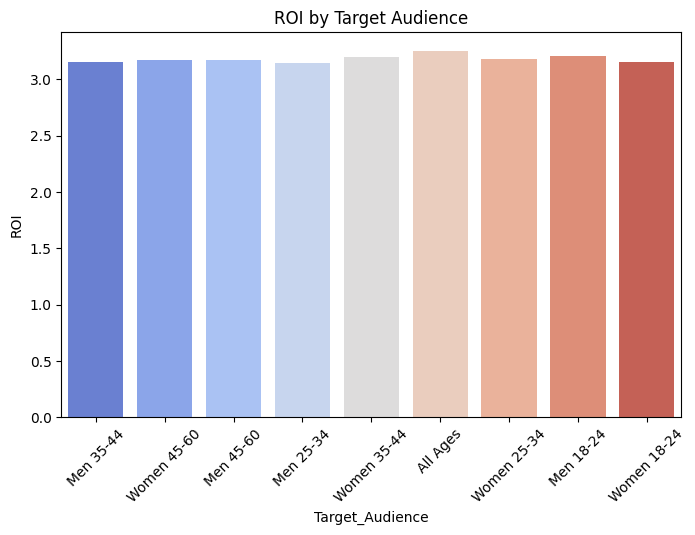

In [15]:
# --- 6️⃣ ROI по целевой аудитории ---
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Target_Audience', y='ROI', ci=None, palette='coolwarm')
plt.title('ROI by Target Audience')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3108326273.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Customer_Segment', y='ROI', ci=None, palette='mako')
/tmp/ipython-input-3108326273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Customer_Segment', y='ROI', ci=None, palette='mako')


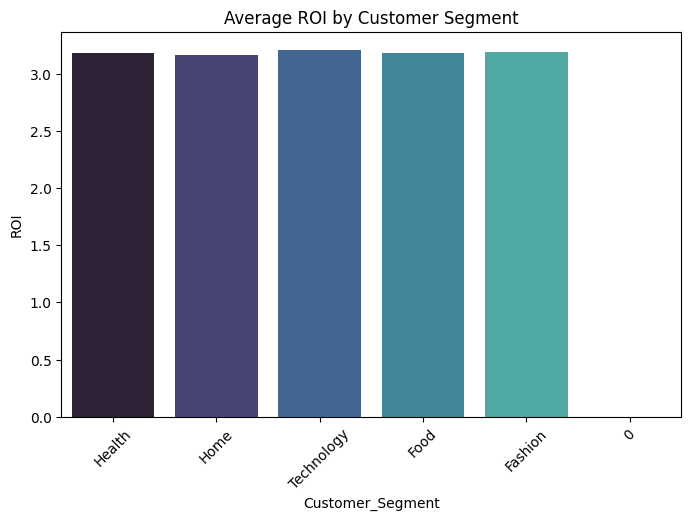

In [18]:
# --- Средний ROI по сегментам клиентов ---
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Customer_Segment', y='ROI', ci=None, palette='mako')
plt.title('Average ROI by Customer Segment')
plt.xticks(rotation=45)
plt.show()

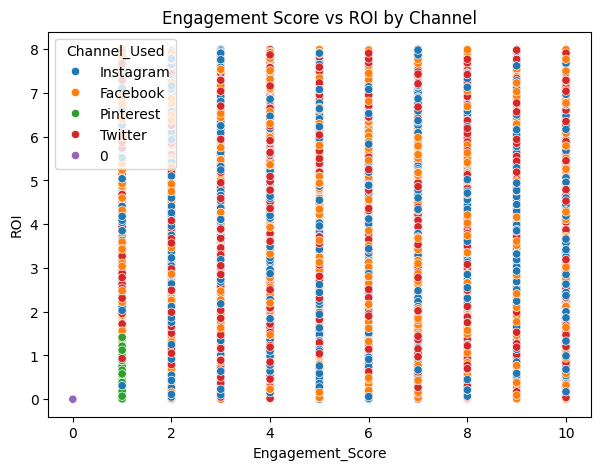

In [16]:
# --- 7️⃣ ROI и Engagement_Score ---
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Engagement_Score', y='ROI', hue='Channel_Used', palette='tab10')
plt.title('Engagement Score vs ROI by Channel')
plt.show()

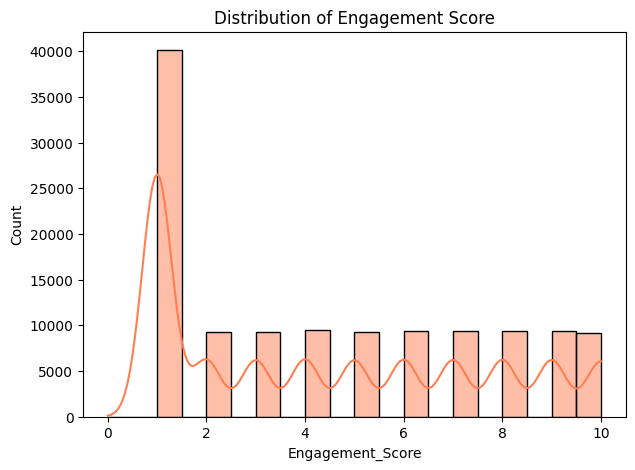

In [17]:
# --- Распределение Engagement_Score ---
plt.figure(figsize=(7,5))
sns.histplot(df['Engagement_Score'], bins=20, kde=True, color='coral')
plt.title('Distribution of Engagement Score')
plt.show()

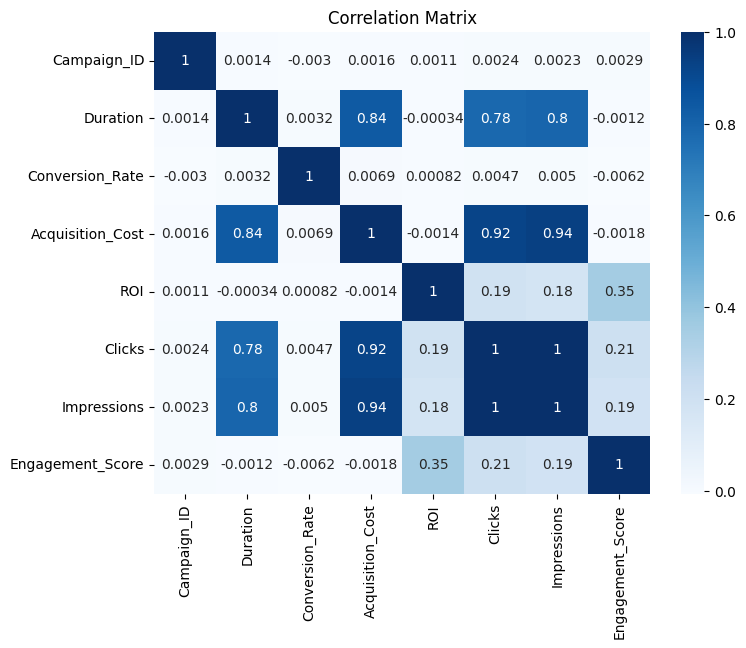

In [19]:
# --- 8️⃣ Корреляционная матрица ---
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [20]:
print(df.columns)

Index(['Campaign_ID', 'Target_Audience', 'Campaign_Goal', 'Duration',
       'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 'ROI',
       'Location', 'Language', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Date', 'Company'],
      dtype='object')


In [21]:
# Категориальные признаки для кодирования
cat_cols = ['Target_Audience', 'Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Company']
df_encoded = pd.get_dummies(df, columns=cat_cols)

In [22]:
# Выделяем признаки и целевую
X = df_encoded.drop(['Campaign_ID', 'Date', 'ROI'], axis=1)
y = df_encoded['ROI']

In [23]:
# Масштабируем признаки
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Разделяем на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=21)

In [25]:
import tensorflow as tf

In [26]:
# Создаем модель MLP
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # линейный выход для регрессии
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Компиляция модели
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.2612 - mae: 1.7858 - val_loss: 4.1567 - val_mae: 1.6104
Epoch 2/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.0602 - mae: 1.5889 - val_loss: 4.1377 - val_mae: 1.6049
Epoch 3/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.0910 - mae: 1.5910 - val_loss: 4.1106 - val_mae: 1.6013
Epoch 4/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.0499 - mae: 1.5882 - val_loss: 4.0990 - val_mae: 1.5984
Epoch 5/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.0179 - mae: 1.5802 - val_loss: 4.1302 - val_mae: 1.6108
Epoch 6/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 4.0298 - mae: 1.5824 - val_loss: 4.1186 - val_mae: 1.6005
Epoch 7/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.0440 - mae: 1.5878 - val_loss: 4.1006 - val_mae: 1.5977
Epoch 8/30
2907/2907 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.9966 - mae: 1.5741 - val_loss: 4.0925 - val_mae: 1.5976
Epoch 9/30
2907/2907 ━━━━━━━━━━━━━━━━

In [30]:
import matplotlib.pyplot as plt
import numpy as np

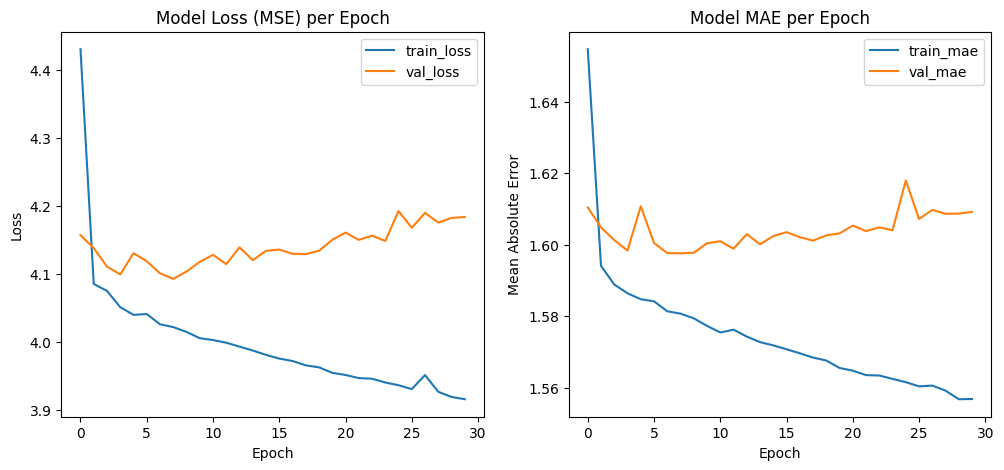

In [31]:
# 1. Графики потерь (loss) и MAE по эпохам
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss (MSE) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Model MAE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

969/969 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


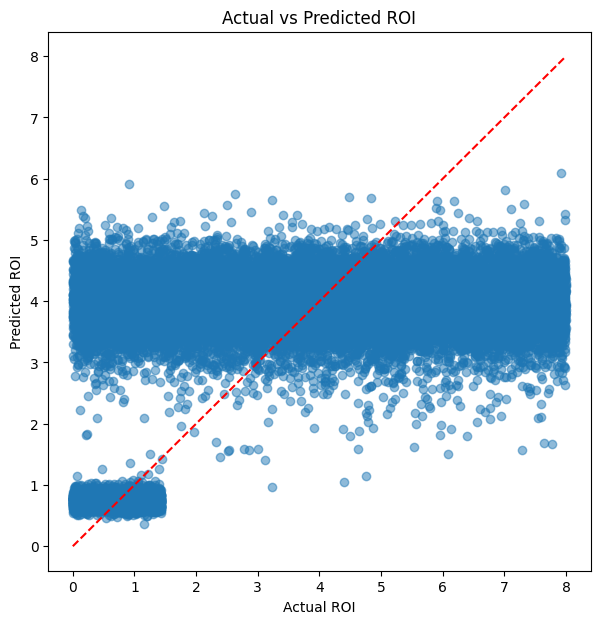

In [32]:
# 2. График предсказанных vs фактических значений ROI
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # диагональ
plt.xlabel('Actual ROI')
plt.ylabel('Predicted ROI')
plt.title('Actual vs Predicted ROI')
plt.show()

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Вернуть все признаки в датафрейм (X_test обратно в DataFrame)
feature_names = X.columns
X_test_df = pd.DataFrame(X_test, columns=feature_names)

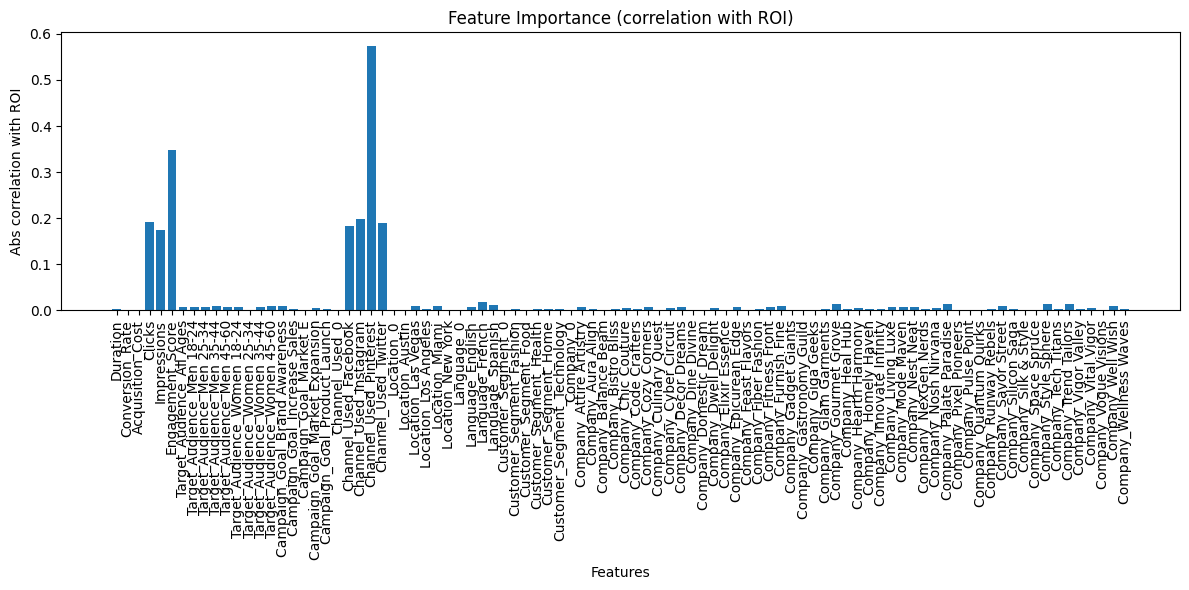

In [35]:
# Посчитать корреляцию каждого признака с целевой переменной
correlations = []
for col in X_test_df.columns:
    correlations.append(np.corrcoef(X_test_df[col], y_test)[0,1])

plt.figure(figsize=(12,6))
plt.bar(feature_names, np.abs(correlations))
plt.xticks(rotation=90)
plt.title("Feature Importance (correlation with ROI)")
plt.xlabel("Features")
plt.ylabel("Abs correlation with ROI")
plt.tight_layout()
plt.show()

In [36]:
def predict_roi(duration, conversion_rate, acquisition_cost, engagement_score):
    full_vector = np.zeros((1, len(X.columns)))
    full_vector[0, 0] = duration            # 'Duration'
    full_vector[0, 1] = conversion_rate     # 'Conversion_Rate'
    full_vector[0, 2] = acquisition_cost    # 'Acquisition_Cost'
    full_vector[0, 5] = engagement_score    # 'Engagement_Score'
    # Остальные признаки — нули
    features_scaled = scaler.transform(full_vector)
    pred_roi = model.predict(features_scaled)
    return f"Predicted ROI: {pred_roi[0][0]:.2f}"

In [37]:
from ipywidgets import interact
interact(
    predict_roi,
    duration=(5, 30),
    conversion_rate=(0.01, 0.3, 0.01),
    acquisition_cost=(100, 2000, 50),
    engagement_score=(1, 10)
)

interactive(children=(IntSlider(value=17, description='duration', max=30, min=5), FloatSlider(value=0.15000000…

<function __main__.predict_roi(duration, conversion_rate, acquisition_cost, engagement_score)>

In [38]:
channel_map = {
   'Facebook': X.columns.get_loc('Channel_Used_Facebook'),
   'Instagram': X.columns.get_loc('Channel_Used_Instagram'),
   'Pinterest': X.columns.get_loc('Channel_Used_Pinterest'),
   'Twitter': X.columns.get_loc('Channel_Used_Twitter')
}
audience_map = {
   'All Ages': X.columns.get_loc('Target_Audience_All Ages'),
   'Men 18-24': X.columns.get_loc('Target_Audience_Men 18-24'),
   # ... добавь остальные варианты ...
   'Women 45-60': X.columns.get_loc('Target_Audience_Women 45-60')
}

In [39]:
def predict_roi(duration, conversion_rate, acquisition_cost, engagement_score, channel, audience):
    full_vector = np.zeros((1, len(X.columns)))
    full_vector[0, 0] = duration
    full_vector[0, 1] = conversion_rate
    full_vector[0, 2] = acquisition_cost
    full_vector[0, 5] = engagement_score
    full_vector[0, channel_map[channel]] = 1
    full_vector[0, audience_map[audience]] = 1
    features_scaled = scaler.transform(full_vector)
    pred_roi = model.predict(features_scaled)
    return f"Predicted ROI: {pred_roi[0][0]:.2f}"

In [42]:
from ipywidgets import interact
interact(
   predict_roi,
   duration=(5, 30),
   conversion_rate=(0.01, 0.3, 0.01),
   acquisition_cost=(100, 2000, 50),
   engagement_score=(1, 10),
   channel=['Facebook', 'Instagram', 'Pinterest', 'Twitter'],
   audience=['All Ages', 'Men 18-24', 'Men 25-34', 'Men 35-44', 'Men 45-60',
             'Women 18-24', 'Women 25-34', 'Women 35-44', 'Women 45-60']
)

interactive(children=(IntSlider(value=17, description='duration', max=30, min=5), FloatSlider(value=0.15000000…

<function __main__.predict_roi(duration, conversion_rate, acquisition_cost, engagement_score, channel, audience)>